In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense

In [3]:
df = pd.read_csv("manch_tok.csv")
df['phon_str'] = df['phon']
df['phon'] = df[['phon']].apply(lambda item : item[0].split("_"), axis = 1)
df

,Unnamed: 0,set,id,stage,word,gram,phon,hour,half_hour,phon_str
0,1,CHI,anne,1,BABY,N|BABY,"[B, EY, B, IY]",1,a,B_EY_B_IY
1,2,MOT,anne,1,HERE@S,PRO:DEM|HERE-N-CL|V|BE&3S,"[HH, IH, R, S]",1,a,HH_IH_R_S
2,3,MOT,anne,1,BABY,N|BABY,"[B, EY, B, IY]",1,a,B_EY_B_IY
3,4,CHI,anne,1,IT,PRO|IT,"[IH, T]",1,a,IH_T
4,5,MOT,anne,1,BABY,N|BABY,"[B, EY, B, IY]",1,a,B_EY_B_IY
...,...,...,...,...,...,...,...,...,...,...
1902356,1902357,CHI,ruth,20,UM,NaN,"[AH, M]",34,b,AH_M
1902357,1902358,MOT,warr,20,CLICK+CLACK,NaN,"[K, L, IH, K, K, L, AE, K]",16,b,K_L_IH_K_K_L_AE_K
1902358,1902359,CHI,warr,20,T+SHIRT,NaN,"[T, IY, SH, ER, T]",30,a,T_IY_SH_ER_T
1902359,1902360,CHI,warr,20,SLOSH,NaN,"[S, L, AA, SH]",33,b,S_L_AA_SH


In [4]:
bnc = pd.read_csv("spok_bnc_typ.csv")
bnc = bnc.rename(columns={'phon' : 'phon_str'})

manch_typ = pd.read_csv("manch_typ.csv")
manch_typ = manch_typ.rename(columns={'phon' : 'phon_str'})
manch_typ

,Unnamed: 0,set,id,stage,phon_str,len,phonemic_len,freq,freq_ter_cm,freq_ter_cm_26,...,nd,nd_ter_cm,nd_ter_cm_26,nd_ter_cm_each_len,nd_ter_cm_each_freq,pp,pp_ter_cm,pp_ter_cm_26,pp_ter_cm_each_len,pp_ter_cm_each_freq
0,1,CHI,anne,1,AA,1,1,7111.881093,3.0,3.0,...,25.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
1,2,CHI,anne,1,AA_N,1,2,8258.262006,3.0,3.0,...,29.0,3.0,3.0,2.0,3.0,0.003553,2.0,2.0,3.0,2.0
2,3,CHI,anne,1,AA_R,1,2,4776.536202,3.0,3.0,...,36.0,3.0,3.0,2.0,3.0,0.005853,3.0,3.0,3.0,3.0
3,4,CHI,anne,1,AE_L_AH_S_T_EH_R,3,7,4.074934,2.0,2.0,...,1.0,1.0,1.0,2.0,1.0,0.007468,3.0,3.0,3.0,3.0
4,5,CHI,anne,1,AE_N,1,2,2086.977641,3.0,3.0,...,44.0,3.0,3.0,3.0,3.0,0.006540,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51952,51953,MOT,warr,20,TH_ER_M_AA_M_AH_T_ER,4,8,0.509367,1.0,1.0,...,1.0,1.0,1.0,3.0,1.0,0.004025,2.0,2.0,1.0,2.0
51953,51954,MOT,warr,20,TH_IH_K_N_AH_S,2,6,1.731847,1.0,1.0,...,2.0,1.0,1.0,2.0,2.0,0.005092,2.0,3.0,2.0,2.0
51954,51955,MOT,warr,20,W_AO_R,1,3,198.143684,3.0,3.0,...,33.0,3.0,3.0,3.0,3.0,0.004781,2.0,2.0,3.0,2.0
51955,51956,MOT,warr,20,W_EH_L_IH_NG_T_AH_N,3,8,1.426227,1.0,1.0,...,4.0,2.0,1.0,3.0,2.0,0.010390,3.0,3.0,3.0,3.0


In [5]:
ids = ['anne', 'aran', 'becky', 'carl', 'domin', 'gail', 'joel', 'john', 'liz', 'nic', 'ruth', 'warr']
phonemes = ["AA", "AE", "AH", "AO", "AW", "AY", "B", "CH", "D", "DH", "EH", "ER", "EY", "F", "G", "HH", "IH", "IY", "JH", "K", "L", "M", "N", "NG", "OW", "OY", "P", "R", "S","SH", "T", "TH", "UH", "UW", "V", "W", "Y", "Z", "ZH", "<START>", "<END>", "<PAD>"]
vowels = ["AA", "AE", "AH", "AO", "AW", "AY", "EH", "ER", "EY", "IH", "IY", "OW", "OY", "UH", "UW"]
num_phonemes = len(phonemes)

def encode_phon_one_hot(phon):
    vec = np.zeros(len(phonemes))
    vec[phonemes.index(phon)] = 1
    return vec

def decode_phon_one_hot(vec):
    index = np.argmax(vec)
    return phonemes[index]

def vec_to_word(seq):
    seq = seq[np.sum(seq, 1) == 1]
    return [decode_phon_one_hot(vec) for vec in seq]

In [6]:
words = np.unique(df['phon'].to_numpy())
words_str = ['_'.join(word) for word in words]

words_mot = np.unique(df[df.set== 'MOT']['phon'].to_numpy())
words_mot_str = ['_'.join(word) for word in words_mot]


11817

In [10]:
max_word_length_input = max([len(word) for word in df['phon']])
max_word_length_target = max_word_length_input + 2

def get_dataset(id, stage):
    #Prepare Datasets
    input_words = df.copy()
    input_words = input_words[(input_words.id == id) & (input_words.stage == stage) & (input_words.set == 'MOT')][['phon']]

    target_words = input_words.copy()
    target_words['phon'] = target_words['phon'].transform(lambda word : ["<START>"] + word + ["<END>"])

    num_words = len(input_words)
    #max_word_length_input = max([len(word) for word in input_words['phon']])
    #max_word_length_target = max([len(word) for word in target_words['phon']])

    encoder_input = np.zeros((num_words, max_word_length_input, num_phonemes), dtype="float32")
    decoder_input = np.zeros((num_words, max_word_length_target, num_phonemes), dtype="float32")
    decoder_target = np.zeros((num_words, max_word_length_target, num_phonemes), dtype="float32")

    for i, (input_word, target_word) in enumerate(zip(input_words['phon'], target_words['phon'])):
        encoder_input[i] = [encode_phon_one_hot("<PAD>") for _ in range(max_word_length_input)]

        input_word = [encode_phon_one_hot(phon) for phon in input_word]
        encoder_input[i, :len(input_word)] = input_word
        
        #Reverse Inputs
        encoder_input[i] = np.flip(encoder_input[i])


        decoder_input[i] = [encode_phon_one_hot("<PAD>") for _ in range(max_word_length_target)]
        decoder_target[i] = [encode_phon_one_hot("<PAD>") for _ in range(max_word_length_target)]

        target_word = [encode_phon_one_hot(phon) for phon in target_word]
        decoder_input[i, :len(target_word)] = target_word
        decoder_target[i, :len(target_word) - 1] = target_word[1:]
    
    return encoder_input, decoder_input, decoder_target

In [11]:
print(max_word_length_input)
print(max_word_length_target)

28
30


In [12]:
def build_training_model(latent_dim):
    #latent_dim = 16

    encoder_inputs = Input(shape=(None, num_phonemes))
    encoder = LSTM(latent_dim, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    # We discard `encoder_outputs` and only keep the states.
    encoder_states = [state_h, state_c]

    # Set up the decoder, using `encoder_states` as initial state.
    decoder_inputs = Input(shape=(None, num_phonemes))
    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the 
    # return states in the training model, but we will use them in inference.
    decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(num_phonemes, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Define the model that will turn
    # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
    return Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [13]:
#model = keras.models.load_model("test1")
def build_inference_model(model, latent_dim):
    encoder_inputs = model.input[0]  # input_1
    encoder_outputs, state_h_enc, state_c_enc = model.layers[2].output  # lstm_1
    encoder_states = [state_h_enc, state_c_enc]
    encoder_model = keras.Model(encoder_inputs, encoder_states)

    decoder_inputs = model.input[1]  # input_2
    decoder_state_input_h = keras.Input(shape=(latent_dim,))
    decoder_state_input_c = keras.Input(shape=(latent_dim,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_lstm = model.layers[3]
    decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
        decoder_inputs, initial_state=decoder_states_inputs
    )
    decoder_states = [state_h_dec, state_c_dec]
    decoder_dense = model.layers[4]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = keras.Model(
        [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
    )
    
    return (encoder_model, decoder_model)


In [14]:
# Run training
def train_model(model, epochs, e_input, d_input, d_target):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit([e_input, d_input], d_target,
              batch_size=64,
              epochs=epochs,
              validation_split=0)

In [15]:
def predict_word(encoder_model, decoder_model, word):
    encoder_input = np.zeros((1, max_word_length_input, num_phonemes), dtype='float32')
    encoder_input[0] = [encode_phon_one_hot("<PAD>") for _ in range(max_word_length_input)]
    encoder_input[0,:len(word)] = [encode_phon_one_hot(phon) for phon in word]
    encoder_input[0] = np.flip(encoder_input[0])
    
    #print(word)
    #print(encoder_input)
    #print(vec_to_word(encoder_input[0]))
    
    states = encoder_model.predict(encoder_input, verbose = 0)
    
    predicted_phon = '<START>'
    predicted_word = list()
    
    
    while True:
        decoder_input = np.zeros((1, 1, num_phonemes), dtype='float32')
        decoder_input[0,0] = encode_phon_one_hot(predicted_phon)
        decoder_output, h, c = decoder_model.predict([decoder_input] + states, verbose = 0)
        
        states = [h, c]
    
        #print(decoder_output)
        predicted_phon = decode_phon_one_hot(decoder_output[0,0])
        #print(predicted_phon)
        
        if predicted_phon == "<END>" or len(predicted_word) >= max_word_length_input:
            break
            
        predicted_word.append(predicted_phon)
        
    return predicted_word 
        

In [16]:
def predict_words(encoder_model, decoder_model, words):
    encoder_input = np.full((len(words), max_word_length_input, num_phonemes), encode_phon_one_hot("<PAD>"), dtype='float32')
    for i, word in enumerate(words):
        encoder_input[i,:len(word)] = [encode_phon_one_hot(phon) for phon in word]
        encoder_input[i] = np.flip(encoder_input[i])
    
    states = encoder_model.predict(encoder_input, verbose = 0)
    
    predicted_phons = np.array(['<START>' for _ in range(len(words))])
    predicted_words = np.zeros((len(words), max_word_length_input), dtype='object')
    
    
    for i in range(max_word_length_input):
        decoder_input = np.zeros((len(words), 1, num_phonemes), dtype='float32')
        decoder_input = np.array([[encode_phon_one_hot(phon)] for phon in predicted_phons])

        decoder_output, h, c = decoder_model.predict([decoder_input] + states, verbose = 0)
        
        states = [h, c]
    

        predicted_phons = [decode_phon_one_hot(decoder_output[j,0]) for j in range(len(words))]  
        predicted_words[:,i] = predicted_phons
        
        
    return predicted_words
        

In [17]:
latent_dim = 32
models = [build_training_model(latent_dim) for id in ids]
inference_models = [build_inference_model(model, latent_dim) for model in models]

2022-12-05 13:59:14.374408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 13:59:14.376995: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
def evaluate_model(encoder, decoder):
    #encoder, decoder = model[0], model[1]
    words_learned = list()
    #for word in random.choices(words, k=100):
    for word in words:
        pred = predict_word(encoder, decoder, word)
        if pred == word:
            words_learned.append(word)
        #print(word)
        #print(pred)
    print("Words learned: {}".format(len(words_learned)))
    print("Percentage: {}".format(len(words_learned)/len(words)))
    return words_learned
    

In [19]:
def evaluate_model2(encoder, decoder):
    #encoder, decoder = model[0], model[1]
    words_learned = list()
    #test = random.choices(words, k=1000)
    predictions = predict_words(encoder, decoder, words)
    for i in range(len(words)):
        pred = predictions[i]
        pred = pred[(pred != '<END>')&(pred != '<PAD>')]
        if np.array_equal(words[i], pred):
            words_learned.append(pred)
    print("Words learned: {}".format(len(words_learned)))
    print("Percentage: {}".format(len(words_learned)/len(words)))
    return words_learned
    

In [20]:
def evaluate_child(id, stage):
    words_learned = list()
    words_produced = np.unique(df[(df.id == id) & (df.stage == stage) & (df.set == 'MOT')]['phon'].to_numpy())
    for word in words_produced:
        word_str = '_'.join(word)
        if word_str in words_mot_str:
            words_learned.append(word)
            
    print("Words learned: {}".format(len(words_learned)))
    print("Percentage: {}".format(len(words_learned)/len(words)))
    return words_learned

In [ ]:
model_df = pd.DataFrame(columns=('id', 'stage', 'phon', 'phon_str'))
for i in range(len(models)):
    already_learned = set()
    for j in range(20):
        stage = j+1
        encoder_input, decoder_input, decoder_target = get_dataset(ids[i], stage)
        train_model(models[i], 3, encoder_input, decoder_input, decoder_target)
        print('evaluating model {} at stage {}'.format(ids[i], stage))
        words_learned = evaluate_model2(inference_models[i][0], inference_models[i][1])
        for word in words_learned:
            word_str = '_'.join(word)
            if not (word_str in already_learned):
                model_df.loc[len(model_df.index)] = [ids[i], stage, word, word_str]
                already_learned.add(word_str)
        del encoder_input
        del decoder_input
        del decoder_target
        del words_learned
        model_df.to_csv('model_df3.csv', index=False)

model_df.to_csv('model_df3.csv', index=False)

Epoch 1/3
71/71 [==============================] - 15s 138ms/step - loss: 0.4815 - accuracy: 0.8791
Epoch 2/3
71/71 [==============================] - 9s 129ms/step - loss: 0.3756 - accuracy: 0.9031
Epoch 3/3
71/71 [==============================] - 9s 125ms/step - loss: 0.3303 - accuracy: 0.9167
evaluating model becky at stage 1
Words learned: 4
Percentage: 0.0003384953880003385
Epoch 1/3
73/73 [==============================] - 14s 126ms/step - loss: 0.3122 - accuracy: 0.9220
Epoch 2/3
73/73 [==============================] - 10s 132ms/step - loss: 0.2696 - accuracy: 0.9344
Epoch 3/3
73/73 [==============================] - 10s 140ms/step - loss: 0.2261 - accuracy: 0.9466
evaluating model becky at stage 2
Words learned: 38
Percentage: 0.003215706186003216
Epoch 1/3
78/78 [==============================] - 15s 125ms/step - loss: 0.2002 - accuracy: 0.9529
Epoch 2/3
78/78 [==============================] - 10s 132ms/step - loss: 0.1614 - accuracy: 0.9629
Epoch 3/3
78/78 [===============

61/61 [==============================] - 9s 152ms/step - loss: 0.3576 - accuracy: 0.9060
Epoch 3/3
61/61 [==============================] - 10s 159ms/step - loss: 0.3225 - accuracy: 0.9125
evaluating model carl at stage 2
Words learned: 4
Percentage: 0.0003384953880003385
Epoch 1/3
67/67 [==============================] - 14s 133ms/step - loss: 0.2910 - accuracy: 0.9248
Epoch 2/3
67/67 [==============================] - 10s 150ms/step - loss: 0.2531 - accuracy: 0.9385
Epoch 3/3
67/67 [==============================] - 12s 183ms/step - loss: 0.2123 - accuracy: 0.9536
evaluating model carl at stage 3
Words learned: 52
Percentage: 0.0044004400440044
Epoch 1/3
66/66 [==============================] - 14s 140ms/step - loss: 0.1911 - accuracy: 0.9590
Epoch 2/3
66/66 [==============================] - 9s 133ms/step - loss: 0.1568 - accuracy: 0.9661
Epoch 3/3
66/66 [==============================] - 9s 141ms/step - loss: 0.1311 - accuracy: 0.9715
evaluating model carl at stage 4
Words learned:

In [334]:
child_df = pd.DataFrame(columns=('id', 'stage', 'phon', 'phon_str'))
for id_ in ids:
    already_learned = set()
    for j in range(20):
        stage = j+1
        print('evaluating child {} at stage {}'.format(id_, stage))
        words_learned = evaluate_child(id_, stage)
        for word in words_learned:
            word_str = '_'.join(word)
            if not (word_str in already_learned):
                child_df.loc[len(child_df.index)] = [id_, stage, word, word_str]
                already_learned.add(word_str)
        del words_learned

child_df.to_csv('mother_df.csv', index=False)

evaluating child anne at stage 1
Words learned: 673
Percentage: 0.056951849031056954
evaluating child anne at stage 2
Words learned: 663
Percentage: 0.056105610561056105
evaluating child anne at stage 3
Words learned: 718
Percentage: 0.06075992214606076
evaluating child anne at stage 4
Words learned: 708
Percentage: 0.05991368367605991
evaluating child anne at stage 5
Words learned: 778
Percentage: 0.06583735296606584
evaluating child anne at stage 6
Words learned: 759
Percentage: 0.06422949987306423
evaluating child anne at stage 7
Words learned: 719
Percentage: 0.06084454599306084
evaluating child anne at stage 8
Words learned: 803
Percentage: 0.06795294914106795
evaluating child anne at stage 9
Words learned: 764
Percentage: 0.06465261910806465
evaluating child anne at stage 10
Words learned: 775
Percentage: 0.06558348142506558
evaluating child anne at stage 11
Words learned: 821
Percentage: 0.06947617838706947
evaluating child anne at stage 12
Words learned: 793
Percentage: 0.06710

Words learned: 728
Percentage: 0.061606160616061605
evaluating child domin at stage 18
Words learned: 772
Percentage: 0.06532960988406533
evaluating child domin at stage 19
Words learned: 745
Percentage: 0.06304476601506305
evaluating child domin at stage 20
Words learned: 887
Percentage: 0.07506135228907507
evaluating child gail at stage 1
Words learned: 700
Percentage: 0.059236692900059236
evaluating child gail at stage 2
Words learned: 708
Percentage: 0.05991368367605991
evaluating child gail at stage 3
Words learned: 737
Percentage: 0.06236777523906237
evaluating child gail at stage 4
Words learned: 785
Percentage: 0.06642971989506644
evaluating child gail at stage 5
Words learned: 843
Percentage: 0.07133790302107133
evaluating child gail at stage 6
Words learned: 869
Percentage: 0.07353812304307354
evaluating child gail at stage 7
Words learned: 796
Percentage: 0.06736058221206737
evaluating child gail at stage 8
Words learned: 785
Percentage: 0.06642971989506644
evaluating child 

evaluating child nic at stage 15
Words learned: 776
Percentage: 0.06566810527206567
evaluating child nic at stage 16
Words learned: 759
Percentage: 0.06422949987306423
evaluating child nic at stage 17
Words learned: 784
Percentage: 0.06634509604806635
evaluating child nic at stage 18
Words learned: 762
Percentage: 0.06448337141406449
evaluating child nic at stage 19
Words learned: 739
Percentage: 0.06253702293306254
evaluating child nic at stage 20
Words learned: 972
Percentage: 0.08225437928408226
evaluating child ruth at stage 1
Words learned: 713
Percentage: 0.06033680291106034
evaluating child ruth at stage 2
Words learned: 647
Percentage: 0.05475162900905475
evaluating child ruth at stage 3
Words learned: 582
Percentage: 0.04925107895404925
evaluating child ruth at stage 4
Words learned: 645
Percentage: 0.054582381315054586
evaluating child ruth at stage 5
Words learned: 645
Percentage: 0.054582381315054586
evaluating child ruth at stage 6
Words learned: 666
Percentage: 0.05635948

In [22]:
child_df

NameError: name 'child_df' is not defined

In [50]:
model_df = pd.read_csv("model_df2.csv")
model_df['phon'] = model_df[['phon_str']].apply(lambda item : item[0].split("_"), axis = 1)
model_df

,id,stage,phon,phon_str
0,anne,1,[AH],AH
1,anne,2,[OW],OW
2,anne,2,"[W, EH, N]",W_EH_N
3,anne,2,"[Y, UW]",Y_UW
4,anne,3,[AA],AA
...,...,...,...,...
78750,warr,20,"[W, AA, S, P, S, AH, L]",W_AA_S_P_S_AH_L
78751,warr,20,"[W, EH, L, IH, NG, T, AH, N]",W_EH_L_IH_NG_T_AH_N
78752,warr,20,"[W, EH, L, IH, NG, T, AH, N, Z]",W_EH_L_IH_NG_T_AH_N_Z
78753,warr,20,"[W, IY, K, N, AH, S]",W_IY_K_N_AH_S


In [40]:
child_df = pd.read_csv("child_df.csv")
child_df['phon'] = child_df[['phon_str']].apply(lambda item : item[0].split("_"), axis = 1)
child_df

,id,stage,phon,phon_str
0,anne,1,[AA],AA
1,anne,1,"[AA, N]",AA_N
2,anne,1,"[AA, R]",AA_R
3,anne,1,"[AE, L, AH, S, T, EH, R]",AE_L_AH_S_T_EH_R
4,anne,1,"[AE, N]",AE_N
...,...,...,...,...
19315,warr,20,"[T, EY, L, Z]",T_EY_L_Z
19316,warr,20,"[T, IY, S, EH, T]",T_IY_S_EH_T
19317,warr,20,"[TH, AE, NG, K, S]",TH_AE_NG_K_S
19318,warr,20,"[W, AO, K, T]",W_AO_K_T


In [51]:
mot_df = pd.read_csv("mother_df.csv")
mot_df['phon'] = mot_df[['phon_str']].apply(lambda item : item[0].split("_"), axis = 1)
mot_df

,id,stage,phon,phon_str
0,anne,1,[AA],AA
1,anne,1,"[AA, N]",AA_N
2,anne,1,"[AA, N, T, UW]",AA_N_T_UW
3,anne,1,"[AA, R]",AA_R
4,anne,1,"[AA, R, AH, N, T]",AA_R_AH_N_T
...,...,...,...,...
38495,warr,20,"[TH, ER, M, AA, M, AH, T, ER]",TH_ER_M_AA_M_AH_T_ER
38496,warr,20,"[TH, IH, K, N, AH, S]",TH_IH_K_N_AH_S
38497,warr,20,"[W, AO, R]",W_AO_R
38498,warr,20,"[W, EH, L, IH, NG, T, AH, N]",W_EH_L_IH_NG_T_AH_N


In [41]:
def count_syllables(word):
    count = 0
    for phon in word:
        if phon in vowels:
            count = count+1
    return count

In [56]:
model_df['length_syl'] = [count_syllables(word) for word in model_df.phon]
model_df['length_phon'] = [len(word) for word in model_df.phon]
model_df = pd.merge(model_df, bnc[['phon_str', 'nd', 'freq']].drop_duplicates(), on="phon_str", how='left')
model_df = pd.merge(model_df, manch_typ[['phon_str', 'freq_ter_cm', 'freq_ter_cm_26', 'nd_ter_cm']].drop_duplicates(), on="phon_str", how='left')

In [43]:
child_df['length_syl'] = [count_syllables(word) for word in child_df.phon]
child_df['length_phon'] = [len(word) for word in child_df.phon]
child_df = pd.merge(child_df, bnc[['phon_str', 'nd', 'freq']].drop_duplicates(), on="phon_str", how='left')
child_df = pd.merge(child_df, manch_typ[['phon_str', 'freq_ter_cm', 'freq_ter_cm_26', 'nd_ter_cm']].drop_duplicates(), on="phon_str", how='left')

In [52]:
mot_df['length_syl'] = [count_syllables(word) for word in mot_df.phon]
mot_df['length_phon'] = [len(word) for word in mot_df.phon]
mot_df = pd.merge(mot_df, bnc[['phon_str', 'nd', 'freq']].drop_duplicates(), on="phon_str", how='left')
mot_df = pd.merge(mot_df, manch_typ[['phon_str', 'freq_ter_cm', 'freq_ter_cm_26', 'nd_ter_cm']].drop_duplicates(), on="phon_str", how='left')

In [57]:
model_df

,id,stage,phon,phon_str,length_syl,length_phon,nd,freq,freq_ter_cm,freq_ter_cm_26,nd_ter_cm
0,anne,1,[AH],AH,1,1,12.0,21011.278501,3.0,3.0,2.0
1,anne,2,[OW],OW,1,1,28.0,5717.642296,3.0,3.0,3.0
2,anne,2,"[W, EH, N]",W_EH_N,1,3,34.0,2936.295838,3.0,3.0,3.0
3,anne,2,"[Y, UW]",Y_UW,1,2,40.0,23597.435603,3.0,3.0,3.0
4,anne,3,[AA],AA,1,1,25.0,7111.881093,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
78750,warr,20,"[W, AA, S, P, S, AH, L]",W_AA_S_P_S_AH_L,2,7,NaN,NaN,NaN,NaN,NaN
78751,warr,20,"[W, EH, L, IH, NG, T, AH, N]",W_EH_L_IH_NG_T_AH_N,3,8,4.0,1.426227,1.0,1.0,2.0
78752,warr,20,"[W, EH, L, IH, NG, T, AH, N, Z]",W_EH_L_IH_NG_T_AH_N_Z,3,9,2.0,0.203747,NaN,NaN,NaN
78753,warr,20,"[W, IY, K, N, AH, S]",W_IY_K_N_AH_S,2,6,0.0,4.686175,2.0,2.0,1.0


In [46]:
def fit_and_plot(x, t1, t2, t3):
    fit1 = np.polyfit(np.log(x), t1, 1)
    fit2 = np.polyfit(np.log(x), t2, 1)
    fit3 = np.polyfit(np.log(x), t3, 1)

    xr = np.linspace(1, 20, 100)
    yr1 = fit1[1] + fit1[0]*np.log(xr)
    yr2 = fit2[1] + fit2[0]*np.log(xr)
    yr3 = fit3[1] + fit3[0]*np.log(xr)

    plt.plot(xr, yr1, ls='--', label='1')
    plt.plot(xr, yr2, ls='-.', label='2')
    plt.plot(xr, yr3, label='3')
    plt.scatter(x,t1, marker='+', c='#eee', s=25)
    plt.scatter(x,t2, marker='*', c='#eee', s=25)
    plt.scatter(x,t3, marker='x', c='#eee', s=25)
    plt.xticks([1,5,10,15,20])
    plt.grid(axis='y')
    plt.legend(title='Tercil de Frecuencia')
    plt.xlabel('Etapa')
    plt.ylabel('Porcentaje de palabras')
    plt.title('Bebés')
    plt.show()

In [81]:
t1_mod = []
t2_mod = []
t3_mod = []
x_mod = []

t1_chi = []
t2_chi = []
t3_chi = []
x_chi = []

t1_mot = []
t2_mot = []
t3_mot = []
x_mot = []

for i in range(20):
    for id in ids:
        first_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.freq_ter_cm_26 == 1)])
        second_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.freq_ter_cm_26 == 2)])
        third_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.freq_ter_cm_26 == 3)])
        total_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1)&(~(model_df.freq_ter_cm_26.isnull()))])
        
        if total_mod != 0:
            t1_mod.append(100 * first_mod / total_mod)
            t2_mod.append(100 * second_mod / total_mod)
            t3_mod.append(100 * third_mod / total_mod)
            x_mod.append(i+1)
            
            
        first_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.freq_ter_cm_26 == 1)])
        second_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.freq_ter_cm_26 == 2)])
        third_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.freq_ter_cm_26 == 3)])
        total_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1)&(~(child_df.freq_ter_cm_26.isnull()))])
        
        if total_chi != 0:
            t1_chi.append(100 * first_chi / total_chi)
            t2_chi.append(100 * second_chi / total_chi)
            t3_chi.append(100 * third_chi / total_chi)
            x_chi.append(i+1)
        
        
        first_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.freq_ter_cm_26 == 1)])
        second_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.freq_ter_cm_26 == 2)])
        third_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.freq_ter_cm_26 == 3)])
        total_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1)&(~(mot_df.freq_ter_cm_26.isnull()))])
        
        if total_mot != 0:
            t1_mot.append(100 * first_mot / total_mot)
            t2_mot.append(100 * second_mot / total_mot)
            t3_mot.append(100 * third_mot / total_mot)
            x_mot.append(i+1)

                        
#fit_and_plot(x, t1, t2, t3)

#Fit log curves
fit1_mod = np.polyfit(np.log(x_mod), t1_mod, 1)
fit2_mod = np.polyfit(np.log(x_mod), t2_mod, 1)
fit3_mod = np.polyfit(np.log(x_mod), t3_mod, 1)

fit1_chi = np.polyfit(np.log(x_chi), t1_chi, 1)
fit2_chi = np.polyfit(np.log(x_chi), t2_chi, 1)
fit3_chi = np.polyfit(np.log(x_chi), t3_chi, 1)

fit1_mot = np.polyfit(np.log(x_mot), t1_mot, 1)
fit2_mot = np.polyfit(np.log(x_mot), t2_mot, 1)
fit3_mot = np.polyfit(np.log(x_mot), t3_mot, 1)

#Generate curves for plotting
xr = np.linspace(1, 20, 100)

yr1_mod = fit1_mod[1] + fit1_mod[0]*np.log(xr)
yr2_mod = fit2_mod[1] + fit2_mod[0]*np.log(xr)
yr3_mod = fit3_mod[1] + fit3_mod[0]*np.log(xr)

yr1_chi = fit1_chi[1] + fit1_chi[0]*np.log(xr)
yr2_chi = fit2_chi[1] + fit2_chi[0]*np.log(xr)
yr3_chi = fit3_chi[1] + fit3_chi[0]*np.log(xr)

yr1_mot = fit1_mot[1] + fit1_mot[0]*np.log(xr)
yr2_mot = fit2_mot[1] + fit2_mot[0]*np.log(xr)
yr3_mot = fit3_mot[1] + fit3_mot[0]*np.log(xr)


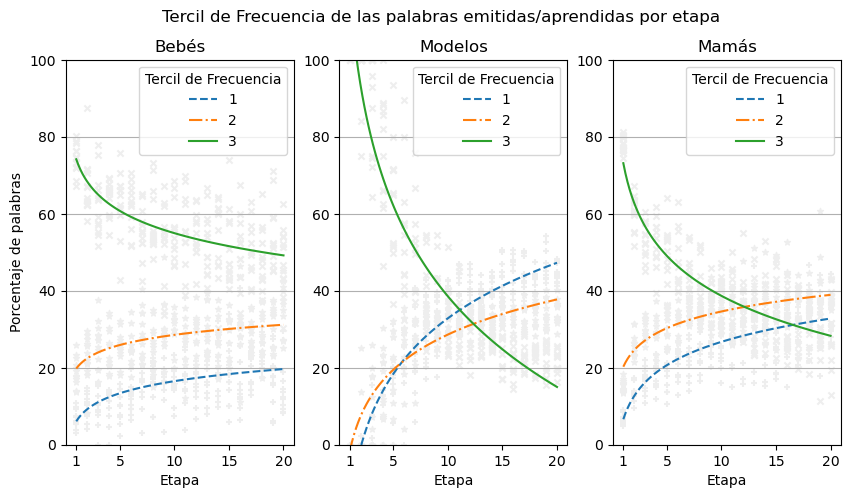

In [82]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle('Tercil de Frecuencia de las palabras emitidas/aprendidas por etapa')


ax1.plot(xr, yr1_chi, ls='--', label='1')
ax1.plot(xr, yr2_chi, ls='-.', label='2')
ax1.plot(xr, yr3_chi, label='3')
ax1.scatter(x_chi,t1_chi, marker='+', c='#eee', s=20)
ax1.scatter(x_chi,t2_chi, marker='*', c='#eee', s=20)
ax1.scatter(x_chi,t3_chi, marker='x', c='#eee', s=20)
ax1.set_xticks([1,5,10,15,20])
ax1.set_yticks([0,20,40,60,80, 100])
ax1.set_ylim([0, 100])
ax1.grid(axis='y')
ax1.legend(title='Tercil de Frecuencia')
ax1.set_xlabel('Etapa')
ax1.set_ylabel('Porcentaje de palabras')
ax1.set_title('Bebés')

ax2.plot(xr, yr1_mod, ls='--', label='1')
ax2.plot(xr, yr2_mod, ls='-.', label='2')
ax2.plot(xr, yr3_mod, label='3')
ax2.scatter(x_mod,t1_mod, marker='+', c='#eee', s=20)
ax2.scatter(x_mod,t2_mod, marker='*', c='#eee', s=20)
ax2.scatter(x_mod,t3_mod, marker='x', c='#eee', s=20)
ax2.set_xticks([1,5,10,15,20])
ax2.set_yticks([0,20,40,60,80, 100])
ax2.set_ylim([0, 100])
ax2.grid(axis='y')
ax2.legend(title='Tercil de Frecuencia')
ax2.set_xlabel('Etapa')
#ax2.set_ylabel('Porcentaje de palabras')
ax2.set_title('Modelos')

ax3.plot(xr, yr1_mot, ls='--', label='1')
ax3.plot(xr, yr2_mot, ls='-.', label='2')
ax3.plot(xr, yr3_mot, label='3')
ax3.scatter(x_mot,t1_mot, marker='+', c='#eee', s=20)
ax3.scatter(x_mot,t2_mot, marker='*', c='#eee', s=20)
ax3.scatter(x_mot,t3_mot, marker='x', c='#eee', s=20)
ax3.set_xticks([1,5,10,15,20])
ax3.set_yticks([0,20,40,60,80, 100])
ax3.set_ylim([0, 100])
ax3.grid(axis='y')
ax3.legend(title='Tercil de Frecuencia')
ax3.set_xlabel('Etapa')
#ax3.set_ylabel('Porcentaje de palabras')
ax3.set_title('Mamás')

plt.show()

In [75]:
t1_mod = []
t2_mod = []
t3_mod = []
x_mod = []

t1_chi = []
t2_chi = []
t3_chi = []
x_chi = []

t1_mot = []
t2_mot = []
t3_mot = []
x_mot = []

for i in range(20):
    for id in ids:
        first_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.nd_ter_cm == 1)])
        second_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.nd_ter_cm == 2)])
        third_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.nd_ter_cm == 3)])
        total_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1)&(~(model_df.nd_ter_cm.isnull()))])
        
        if total_mod != 0:
            t1_mod.append(100 * first_mod / total_mod)
            t2_mod.append(100 * second_mod / total_mod)
            t3_mod.append(100 * third_mod / total_mod)
            x_mod.append(i+1)
            
            
        first_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.nd_ter_cm == 1)])
        second_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.nd_ter_cm == 2)])
        third_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.nd_ter_cm == 3)])
        total_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1)&(~(child_df.nd_ter_cm.isnull()))])
        
        if total_chi != 0:
            t1_chi.append(100 * first_chi / total_chi)
            t2_chi.append(100 * second_chi / total_chi)
            t3_chi.append(100 * third_chi / total_chi)
            x_chi.append(i+1)
        
        
        first_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.nd_ter_cm == 1)])
        second_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.nd_ter_cm == 2)])
        third_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.nd_ter_cm == 3)])
        total_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1)&(~(mot_df.nd_ter_cm.isnull()))])
        
        if total_mot != 0:
            t1_mot.append(100 * first_mot / total_mot)
            t2_mot.append(100 * second_mot / total_mot)
            t3_mot.append(100 * third_mot / total_mot)
            x_mot.append(i+1)

                        
#fit_and_plot(x, t1, t2, t3)

#Fit log curves
fit1_mod = np.polyfit(np.log(x_mod), t1_mod, 1)
fit2_mod = np.polyfit(np.log(x_mod), t2_mod, 1)
fit3_mod = np.polyfit(np.log(x_mod), t3_mod, 1)

fit1_chi = np.polyfit(np.log(x_chi), t1_chi, 1)
fit2_chi = np.polyfit(np.log(x_chi), t2_chi, 1)
fit3_chi = np.polyfit(np.log(x_chi), t3_chi, 1)

fit1_mot = np.polyfit(np.log(x_mot), t1_mot, 1)
fit2_mot = np.polyfit(np.log(x_mot), t2_mot, 1)
fit3_mot = np.polyfit(np.log(x_mot), t3_mot, 1)

#Generate curves for plotting
xr = np.linspace(1, 20, 100)

yr1_mod = fit1_mod[1] + fit1_mod[0]*np.log(xr)
yr2_mod = fit2_mod[1] + fit2_mod[0]*np.log(xr)
yr3_mod = fit3_mod[1] + fit3_mod[0]*np.log(xr)

yr1_chi = fit1_chi[1] + fit1_chi[0]*np.log(xr)
yr2_chi = fit2_chi[1] + fit2_chi[0]*np.log(xr)
yr3_chi = fit3_chi[1] + fit3_chi[0]*np.log(xr)

yr1_mot = fit1_mot[1] + fit1_mot[0]*np.log(xr)
yr2_mot = fit2_mot[1] + fit2_mot[0]*np.log(xr)
yr3_mot = fit3_mot[1] + fit3_mot[0]*np.log(xr)


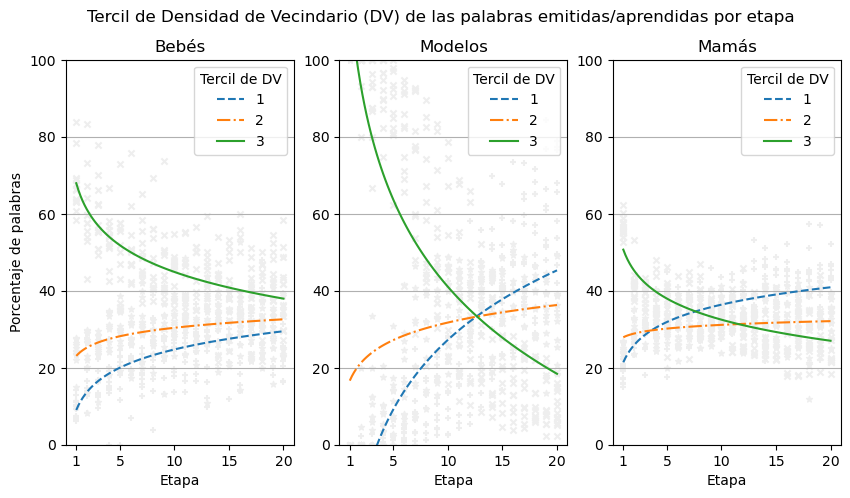

In [80]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle('Tercil de Densidad de Vecindario (DV) de las palabras emitidas/aprendidas por etapa')


ax1.plot(xr, yr1_chi, ls='--', label='1')
ax1.plot(xr, yr2_chi, ls='-.', label='2')
ax1.plot(xr, yr3_chi, label='3')
ax1.scatter(x_chi,t1_chi, marker='+', c='#eee', s=20)
ax1.scatter(x_chi,t2_chi, marker='*', c='#eee', s=20)
ax1.scatter(x_chi,t3_chi, marker='x', c='#eee', s=20)
ax1.set_xticks([1,5,10,15,20])
ax1.set_yticks([0,20,40,60,80, 100])
ax1.set_ylim([0, 100])
ax1.grid(axis='y')
ax1.legend(title='Tercil de DV')
ax1.set_xlabel('Etapa')
ax1.set_ylabel('Porcentaje de palabras')
ax1.set_title('Bebés')

ax2.plot(xr, yr1_mod, ls='--', label='1')
ax2.plot(xr, yr2_mod, ls='-.', label='2')
ax2.plot(xr, yr3_mod, label='3')
ax2.scatter(x_mod,t1_mod, marker='+', c='#eee', s=20)
ax2.scatter(x_mod,t2_mod, marker='*', c='#eee', s=20)
ax2.scatter(x_mod,t3_mod, marker='x', c='#eee', s=20)
ax2.set_xticks([1,5,10,15,20])
ax2.set_yticks([0,20,40,60,80, 100])
ax2.set_ylim([0, 100])
ax2.grid(axis='y')
ax2.legend(title='Tercil de DV')
ax2.set_xlabel('Etapa')
#ax2.set_ylabel('Porcentaje de palabras')
ax2.set_title('Modelos')

ax3.plot(xr, yr1_mot, ls='--', label='1')
ax3.plot(xr, yr2_mot, ls='-.', label='2')
ax3.plot(xr, yr3_mot, label='3')
ax3.scatter(x_mot,t1_mot, marker='+', c='#eee', s=20)
ax3.scatter(x_mot,t2_mot, marker='*', c='#eee', s=20)
ax3.scatter(x_mot,t3_mot, marker='x', c='#eee', s=20)
ax3.set_xticks([1,5,10,15,20])
ax3.set_yticks([0,20,40,60,80, 100])
ax3.set_ylim([0, 100])
ax3.grid(axis='y')
ax3.legend(title='Tercil de DV')
ax3.set_xlabel('Etapa')
#ax3.set_ylabel('Porcentaje de palabras')
ax3.set_title('Mamás')

plt.show()

In [83]:
t1_mod = []
t2_mod = []
t3_mod = []
x_mod = []

t1_chi = []
t2_chi = []
t3_chi = []
x_chi = []

t1_mot = []
t2_mot = []
t3_mot = []
x_mot = []

for i in range(20):
    for id in ids:
        first_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.length_syl == 1)])
        second_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.length_syl == 2)])
        third_mod = len(model_df[(model_df.id == id) & (model_df.stage == i+1) & (model_df.length_syl == 3)])
        total_mod = first_mod + second_mod + third_mod
        
        if total_mod != 0:
            t1_mod.append(100 * first_mod / total_mod)
            t2_mod.append(100 * second_mod / total_mod)
            t3_mod.append(100 * third_mod / total_mod)
            x_mod.append(i+1)
            
            
        first_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.length_syl == 1)])
        second_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.length_syl == 2)])
        third_chi = len(child_df[(child_df.id == id) & (child_df.stage == i+1) & (child_df.length_syl == 3)])
        total_chi = first_chi + second_chi + third_chi
        
        if total_chi != 0:
            t1_chi.append(100 * first_chi / total_chi)
            t2_chi.append(100 * second_chi / total_chi)
            t3_chi.append(100 * third_chi / total_chi)
            x_chi.append(i+1)
        
        
        first_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.length_syl == 1)])
        second_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.length_syl == 2)])
        third_mot = len(mot_df[(mot_df.id == id) & (mot_df.stage == i+1) & (mot_df.length_syl == 3)])
        total_mot = first_mot + second_mot + third_mot
        
        if total_mot != 0:
            t1_mot.append(100 * first_mot / total_mot)
            t2_mot.append(100 * second_mot / total_mot)
            t3_mot.append(100 * third_mot / total_mot)
            x_mot.append(i+1)

                        
#fit_and_plot(x, t1, t2, t3)

#Fit log curves
fit1_mod = np.polyfit(np.log(x_mod), t1_mod, 1)
fit2_mod = np.polyfit(np.log(x_mod), t2_mod, 1)
fit3_mod = np.polyfit(np.log(x_mod), t3_mod, 1)

fit1_chi = np.polyfit(np.log(x_chi), t1_chi, 1)
fit2_chi = np.polyfit(np.log(x_chi), t2_chi, 1)
fit3_chi = np.polyfit(np.log(x_chi), t3_chi, 1)

fit1_mot = np.polyfit(np.log(x_mot), t1_mot, 1)
fit2_mot = np.polyfit(np.log(x_mot), t2_mot, 1)
fit3_mot = np.polyfit(np.log(x_mot), t3_mot, 1)

#Generate curves for plotting
xr = np.linspace(1, 20, 100)

yr1_mod = fit1_mod[1] + fit1_mod[0]*np.log(xr)
yr2_mod = fit2_mod[1] + fit2_mod[0]*np.log(xr)
yr3_mod = fit3_mod[1] + fit3_mod[0]*np.log(xr)

yr1_chi = fit1_chi[1] + fit1_chi[0]*np.log(xr)
yr2_chi = fit2_chi[1] + fit2_chi[0]*np.log(xr)
yr3_chi = fit3_chi[1] + fit3_chi[0]*np.log(xr)

yr1_mot = fit1_mot[1] + fit1_mot[0]*np.log(xr)
yr2_mot = fit2_mot[1] + fit2_mot[0]*np.log(xr)
yr3_mot = fit3_mot[1] + fit3_mot[0]*np.log(xr)


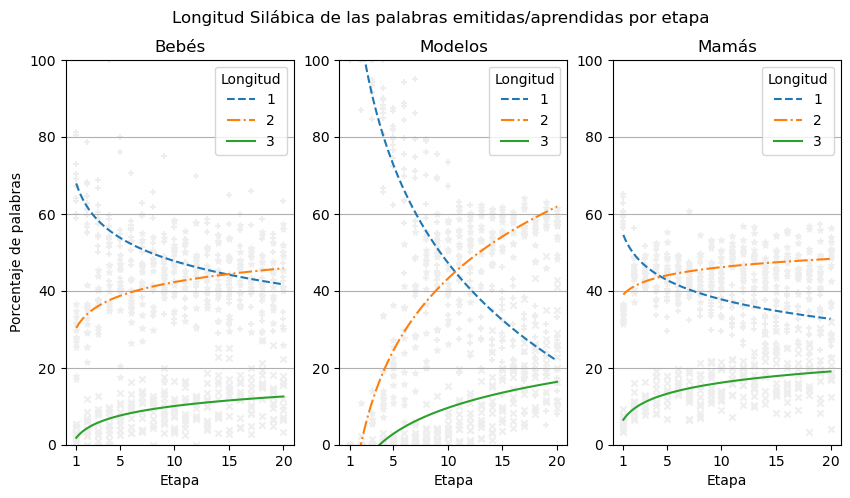

In [84]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
fig.suptitle('Longitud Silábica de las palabras emitidas/aprendidas por etapa')


ax1.plot(xr, yr1_chi, ls='--', label='1')
ax1.plot(xr, yr2_chi, ls='-.', label='2')
ax1.plot(xr, yr3_chi, label='3')
ax1.scatter(x_chi,t1_chi, marker='+', c='#eee', s=20)
ax1.scatter(x_chi,t2_chi, marker='*', c='#eee', s=20)
ax1.scatter(x_chi,t3_chi, marker='x', c='#eee', s=20)
ax1.set_xticks([1,5,10,15,20])
ax1.set_yticks([0,20,40,60,80, 100])
ax1.set_ylim([0, 100])
ax1.grid(axis='y')
ax1.legend(title='Longitud')
ax1.set_xlabel('Etapa')
ax1.set_ylabel('Porcentaje de palabras')
ax1.set_title('Bebés')

ax2.plot(xr, yr1_mod, ls='--', label='1')
ax2.plot(xr, yr2_mod, ls='-.', label='2')
ax2.plot(xr, yr3_mod, label='3')
ax2.scatter(x_mod,t1_mod, marker='+', c='#eee', s=20)
ax2.scatter(x_mod,t2_mod, marker='*', c='#eee', s=20)
ax2.scatter(x_mod,t3_mod, marker='x', c='#eee', s=20)
ax2.set_xticks([1,5,10,15,20])
ax2.set_yticks([0,20,40,60,80, 100])
ax2.set_ylim([0, 100])
ax2.grid(axis='y')
ax2.legend(title='Longitud')
ax2.set_xlabel('Etapa')
#ax2.set_ylabel('Porcentaje de palabras')
ax2.set_title('Modelos')

ax3.plot(xr, yr1_mot, ls='--', label='1')
ax3.plot(xr, yr2_mot, ls='-.', label='2')
ax3.plot(xr, yr3_mot, label='3')
ax3.scatter(x_mot,t1_mot, marker='+', c='#eee', s=20)
ax3.scatter(x_mot,t2_mot, marker='*', c='#eee', s=20)
ax3.scatter(x_mot,t3_mot, marker='x', c='#eee', s=20)
ax3.set_xticks([1,5,10,15,20])
ax3.set_yticks([0,20,40,60,80, 100])
ax3.set_ylim([0, 100])
ax3.grid(axis='y')
ax3.legend(title='Longitud')
ax3.set_xlabel('Etapa')
#ax3.set_ylabel('Porcentaje de palabras')
ax3.set_title('Mamás')

plt.show()

In [53]:
#Test for determining training time for each stage
words_learned_by_epoch = list()
encoder_input, decoder_input, decoder_target = get_dataset(ids[0], 1)
for i in range(20):
    train_model(models[0], 5, encoder_input, decoder_input, decoder_target)
    words_learned_by_epoch.append(evaluate_model(inference_models[0][0], inference_models[0][1]))

words_learned_df = pd.DataFrame(words_learned_by_epoch)
words_learned_df.to_csv('wordsLearned.csv', index=False) 

Epoch 1/5
101/101 [==============================] - 19s 130ms/step - loss: 1.1338 - accuracy: 0.8181
Epoch 2/5
101/101 [==============================] - 13s 127ms/step - loss: 0.4399 - accuracy: 0.8890
Epoch 3/5
101/101 [==============================] - 13s 126ms/step - loss: 0.3726 - accuracy: 0.9039
Epoch 4/5
101/101 [==============================] - 13s 127ms/step - loss: 0.3232 - accuracy: 0.9174
Epoch 5/5
101/101 [==============================] - 13s 130ms/step - loss: 0.2861 - accuracy: 0.9314
Words learned: 0
Percentage: 0.0
Epoch 1/5
101/101 [==============================] - 17s 125ms/step - loss: 0.2658 - accuracy: 0.9376
Epoch 2/5
101/101 [==============================] - 13s 128ms/step - loss: 0.2183 - accuracy: 0.9499
Epoch 3/5
101/101 [==============================] - 13s 129ms/step - loss: 0.1785 - accuracy: 0.9584
Epoch 4/5
101/101 [==============================] - 13s 131ms/step - loss: 0.1408 - accuracy: 0.9696
Epoch 5/5
101/101 [==============================

In [63]:
words_learned_by_epoch = list()
for i in range(20):
    encoder_input, decoder_input, decoder_target = get_dataset(ids[0], i+1)
    train_model(models[0], 2, encoder_input, decoder_input, decoder_target)
    words_learned_by_epoch.append(evaluate_model(inference_models[0][0], inference_models[0][1]))

words_learned_df = pd.DataFrame(words_learned_by_epoch)
words_learned_df.to_csv('wordsLearned.csv', index=False) 

Epoch 1/2
101/101 [==============================] - 18s 133ms/step - loss: 1.0548 - accuracy: 0.8339
Epoch 2/2
101/101 [==============================] - 13s 125ms/step - loss: 0.4264 - accuracy: 0.8924



KeyboardInterrupt



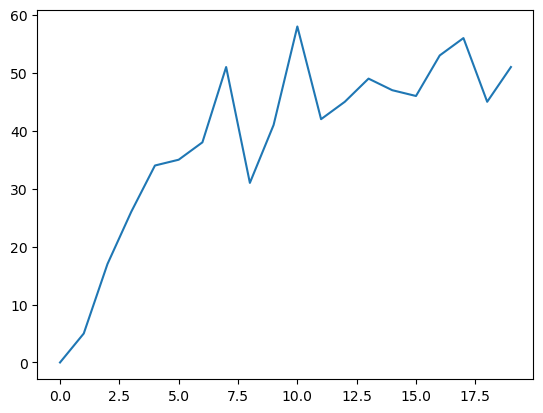

In [58]:
plt.plot([len(words) for words in words_learned_by_epoch])